<a href="https://colab.research.google.com/github/Tomawock/MLDM_COVID-19/blob/master/Meteo_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creazione del dataSet Meteo

Unione dei dataset sensori meteo e i dati legati ad esso

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import glob
os.chdir('/content/drive/Shared drives/MLDM progetto/Datasets')

In [ ]:
#Carica dati dai file
stazioni_meteo = pd.read_csv("/content/drive/Shared drives/MLDM progetto/Datasets/Stazioni_Meteorologiche.csv") 
dati_stazioni = pd.read_csv("/content/drive/Shared drives/MLDM progetto/Datasets/Dati_sensori_meteo_2020_4_8_2020.csv") 

In [ ]:
stazioni_con_dati = stazioni_meteo.merge(dati_stazioni, on='IdSensore')
stazioni_con_dati.head(3)

,IdSensore,Tipologia,Unità DiMisura,IdStazione,NomeStazione,Quota,Provincia,DataStart,DataStop,Storico,UTM_Nord,UTM_Est,lng,lat,location,Limiti amministrativi 2014 delle province di Regione Lombardia,Limiti amministrativi 2015 delle province di Regione Lombardia,Data,Valore,Stato,idOperatore
0,22006,Umidità Relativa,%,1890,Tavernole sul Mella Monte Guglielmo,1790,BS,14/10/2019,NaN,N,5067376,591417,10.175407,45.753896,"(45.75389593743312, 10.175407094582125)",6.0,6.0,01/01/2020 00:10:00,32.0,VA,1
1,22006,Umidità Relativa,%,1890,Tavernole sul Mella Monte Guglielmo,1790,BS,14/10/2019,NaN,N,5067376,591417,10.175407,45.753896,"(45.75389593743312, 10.175407094582125)",6.0,6.0,01/01/2020 00:20:00,32.0,VA,1
2,22006,Umidità Relativa,%,1890,Tavernole sul Mella Monte Guglielmo,1790,BS,14/10/2019,NaN,N,5067376,591417,10.175407,45.753896,"(45.75389593743312, 10.175407094582125)",6.0,6.0,01/01/2020 00:30:00,32.0,VA,1


In [ ]:
variazione_righe=[]
variazione_righe.append(stazioni_con_dati.shape[0])
print(variazione_righe)
print(stazioni_con_dati.dtypes)


[35665990]
IdSensore                                                           int64
Tipologia                                                          object
Unità DiMisura                                                     object
IdStazione                                                          int64
NomeStazione                                                       object
Quota                                                               int64
Provincia                                                          object
DataStart                                                          object
DataStop                                                           object
Storico                                                            object
UTM_Nord                                                            int64
UTM_Est                                                             int64
lng                                                               float64
lat                        

In [ ]:
del stazioni_con_dati['Unità\xa0DiMisura']
del stazioni_con_dati['Provincia']
del stazioni_con_dati['IdStazione']
del stazioni_con_dati['NomeStazione']
del stazioni_con_dati['Quota']
del stazioni_con_dati['DataStart']
del stazioni_con_dati['DataStop']
del stazioni_con_dati['Storico']
del stazioni_con_dati['UTM_Nord']
del stazioni_con_dati['UTM_Est']
del stazioni_con_dati['lng']
del stazioni_con_dati['lat']
del stazioni_con_dati['location']
del stazioni_con_dati['Limiti amministrativi 2014 delle province di Regione Lombardia']
del stazioni_con_dati['Limiti amministrativi 2015 delle province di Regione Lombardia']
del stazioni_con_dati['Stato']
del stazioni_con_dati['IdSensore']

In [ ]:
#elimina le righe con valore mancante -9999
stazioni_con_dati_mod=0
stazioni_con_dati_mod = stazioni_con_dati[stazioni_con_dati.Valore != -9999]
variazione_righe.append(stazioni_con_dati_mod.shape[0])

In [ ]:
#elimina le righe con direzione vento variabile  888,8888 
stazioni_con_dati_mod = stazioni_con_dati[stazioni_con_dati.Valore != 888.8888]
variazione_righe.append(stazioni_con_dati_mod.shape[0])

In [ ]:
 #elimina le righe con direzione vento calmo  777, 7777
stazioni_con_dati_mod = stazioni_con_dati[stazioni_con_dati.Valore != 777.7777]
variazione_righe.append(stazioni_con_dati_mod.shape[0])

In [ ]:
#elimno le righe che non hanno id uguale a 1
stazioni_con_dati_mod = stazioni_con_dati[stazioni_con_dati.idOperatore ==1]
variazione_righe.append(stazioni_con_dati_mod.shape[0])

In [ ]:
print(variazione_righe)

[35665990, 35665990, 35665990, 35665990, 23399980]


In [ ]:
del stazioni_con_dati_mod['idOperatore']

In [ ]:
stazioni_con_dati_mod.head(3)

,Tipologia,Data,Valore
0,Umidità Relativa,01/01/2020 00:10:00,32.0
1,Umidità Relativa,01/01/2020 00:20:00,32.0
2,Umidità Relativa,01/01/2020 00:30:00,32.0


In [ ]:
stazioni_con_dati_mod.to_csv("meteo_merged.csv", index=False)

FASE 2 di modifca ma prima esposrto tuytto in un file csv se nio ci si mette la vita 

In [ ]:
#Carica dati dai file
stazioni_con_dati_mod = pd.read_csv("/content/drive/Shared drives/MLDM progetto/Datasets/meteo_merged.csv") 

In [ ]:
variazione_righe=[]
variazione_righe.append(stazioni_con_dati_mod.shape[0])
stazioni_con_dati_mod.head(3)

,Tipologia,Data,Valore
0,Umidità Relativa,01/01/2020 00:10:00,32.0
1,Umidità Relativa,01/01/2020 00:20:00,32.0
2,Umidità Relativa,01/01/2020 00:30:00,32.0


In [ ]:
stazioni_con_dati_mod['Data'] = pd.to_datetime(stazioni_con_dati_mod['Data'], format='%d/%m/%Y %H:%M:%S')

In [ ]:
#normalizza per avere ancoa la data con datetime e non object
stazioni_con_dati_mod['Data'] =stazioni_con_dati_mod['Data'].dt.normalize()

In [ ]:
variazione_righe.append(stazioni_con_dati_mod.shape[0])
print(variazione_righe)

[23399980, 23399980]


In [ ]:
stazioni_con_dati_media_giornaliera=stazioni_con_dati_mod.groupby(['Data', 'Tipologia'])['Valore'].mean().reset_index()
print(stazioni_con_dati_media_giornaliera.tail(1))
stazioni_con_dati_media_giornaliera.shape


           Data       Tipologia    Valore
1497 2020-08-01  Velocità Vento  1.529539


(1498, 3)

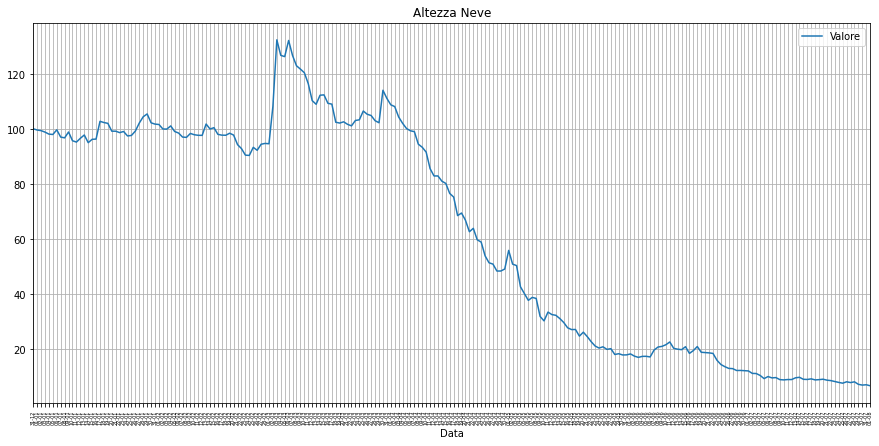

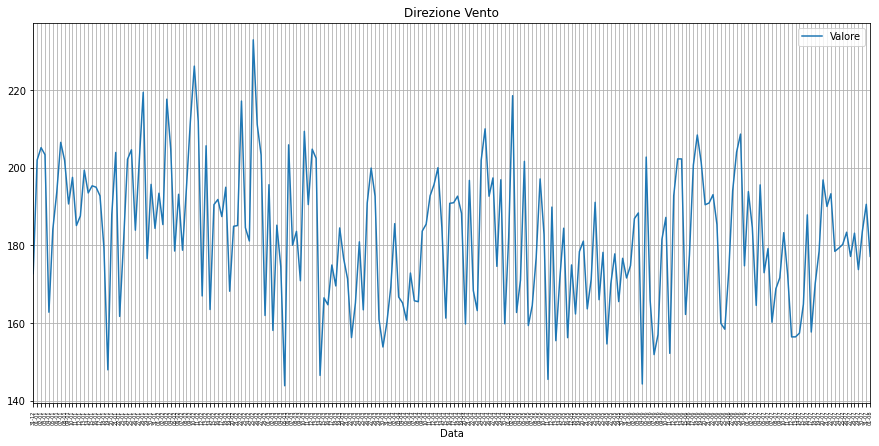

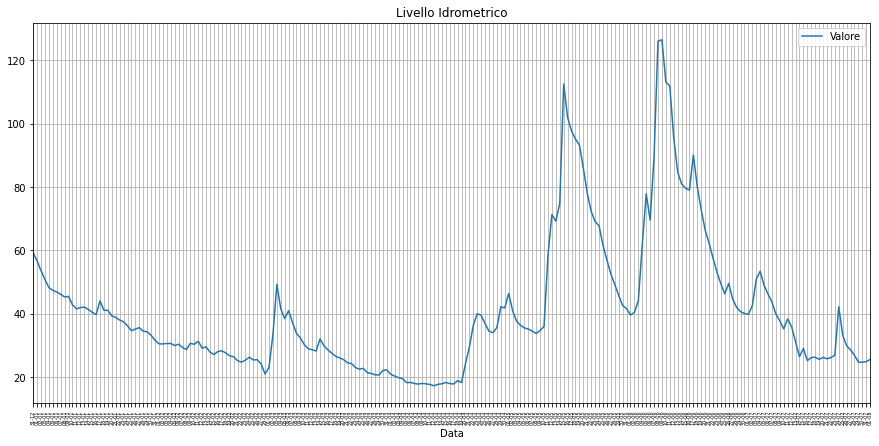

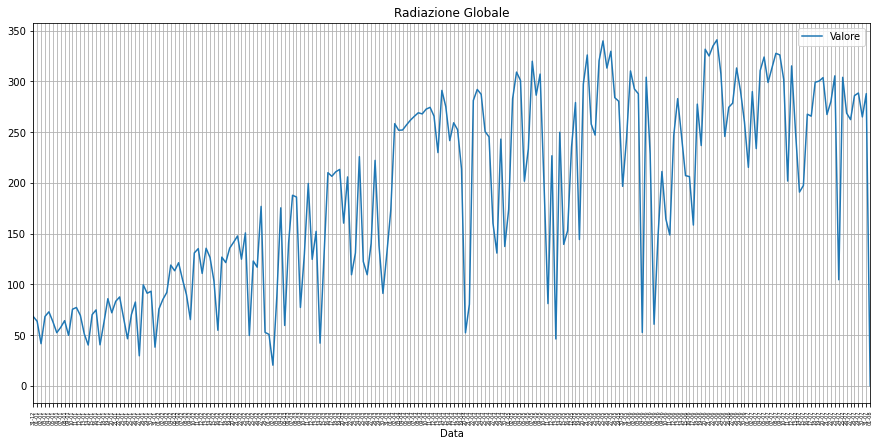

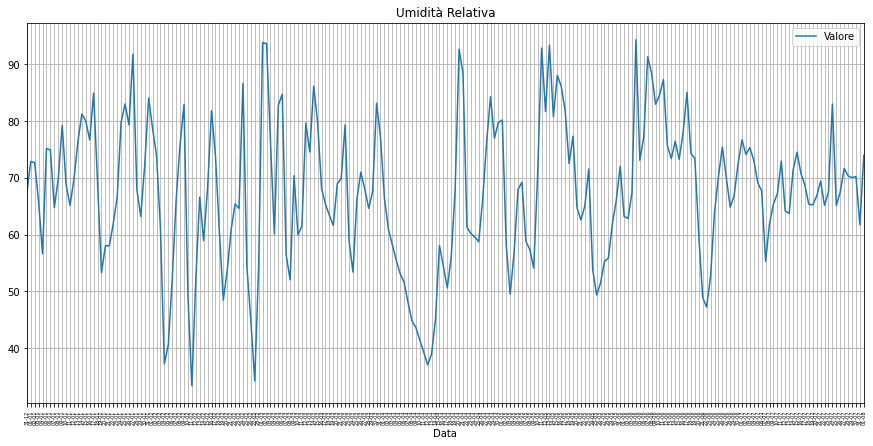

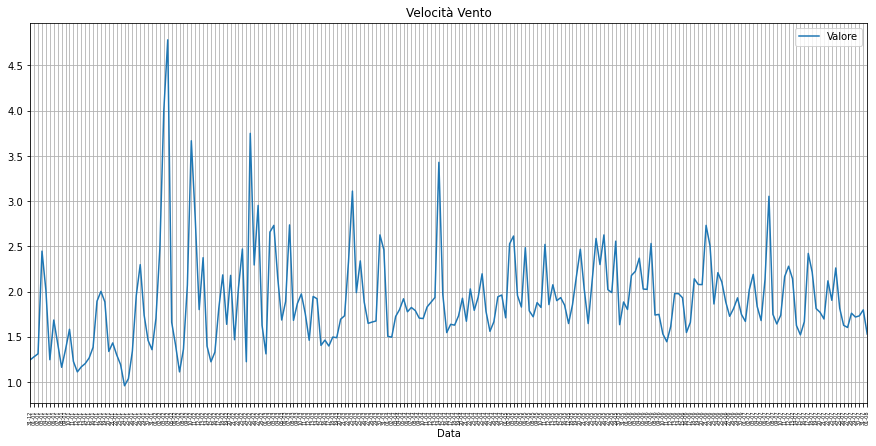

In [ ]:
dati=[]
dati.append(stazioni_con_dati_media_giornaliera.loc[stazioni_con_dati_media_giornaliera['Tipologia']== 'Altezza Neve'])
dati.append(stazioni_con_dati_media_giornaliera.loc[stazioni_con_dati_media_giornaliera['Tipologia']== 'Direzione Vento'])
dati.append(stazioni_con_dati_media_giornaliera.loc[stazioni_con_dati_media_giornaliera['Tipologia']== 'Livello Idrometrico'])
dati.append(stazioni_con_dati_media_giornaliera.loc[stazioni_con_dati_media_giornaliera['Tipologia']== 'Radiazione Globale'])
dati.append(stazioni_con_dati_media_giornaliera.loc[stazioni_con_dati_media_giornaliera['Tipologia']== 'Umidità Relativa'])
dati.append(stazioni_con_dati_media_giornaliera.loc[stazioni_con_dati_media_giornaliera['Tipologia']== 'Velocità Vento'])

for dato in dati:
  dato.set_index('Data', inplace=True)
  fig, ax = plt.subplots(figsize=(15,7))
  dato.plot(ax=ax,title=dato['Tipologia'].values[0])

  #set ticks every week
  ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
  #set major ticks format
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
  plt.xticks(fontsize=5, rotation=90)
  ax.grid(True)
  

In [ ]:
stazioni_con_dati_media_giornaliera.to_csv("meteo_merged_finale.csv", index=False)

In [ ]:
stazioni_con_dati_media_giornaliera_ordinate = stazioni_con_dati_media_giornaliera.pivot_table(index='Data', columns='Tipologia', values='Valore')
stazioni_con_dati_media_giornaliera_ordinate.columns = list(stazioni_con_dati_media_giornaliera_ordinate.columns)
stazioni_con_dati_media_giornaliera_ordinate = stazioni_con_dati_media_giornaliera_ordinate.reset_index()
stazioni_con_dati_media_giornaliera_ordinate.to_csv("meteo_merged_colonne_ordinate_finale.csv", index=False)

In [ ]:
dim_righe=stazioni_con_dati_media_giornaliera_ordinate.shape[0]
giorni_diff=(dt.date(2020,8,1)-dt.date(2020,1,1)).days

if dim_righe-1 == giorni_diff:
  print('No missing values on dates, ogni giorno ha i dati o almeno ha alcuni dati ')
else:
  print("Ci sono missing values",abs(dim_righe-1-giorni_diff))

No missing values on dates, ogni giorno ha i dati o almeno ha alcuni dati 
